<a href="https://colab.research.google.com/github/szh141/colab/blob/main/skimage_Decon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import data,filters,io,morphology,feature,color,measure,io
import pandas as pd
import cv2
from skimage import exposure

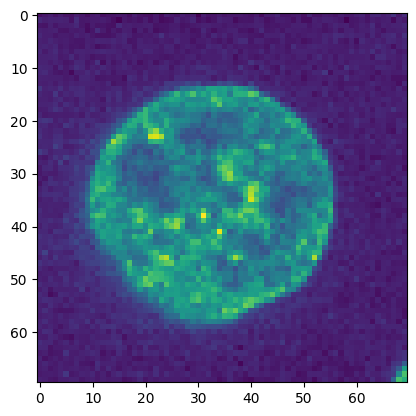

In [ ]:
test = data.cells3d()[30,1,120:190,80:150]
plt.imshow(test)

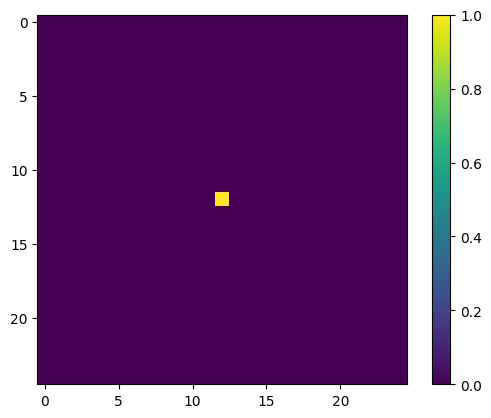

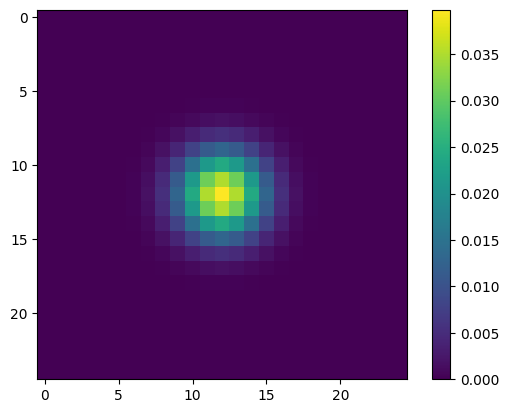

1.0000000000000002


In [ ]:
width = 25
psf = np.zeros((width,width))
psf[width//2,width//2] = 1
plt.imshow(psf)
plt.colorbar()
plt.show()
psf_real = filters.gaussian(psf,sigma =2)
plt.imshow(psf_real)
plt.colorbar()
plt.show()
print(np.sum(psf_real))


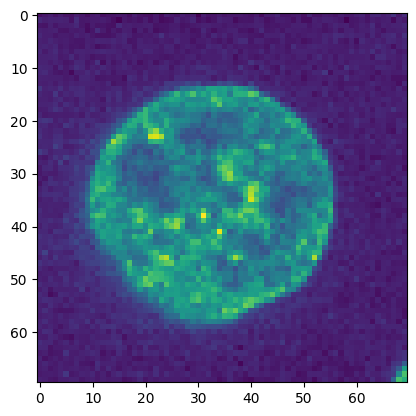

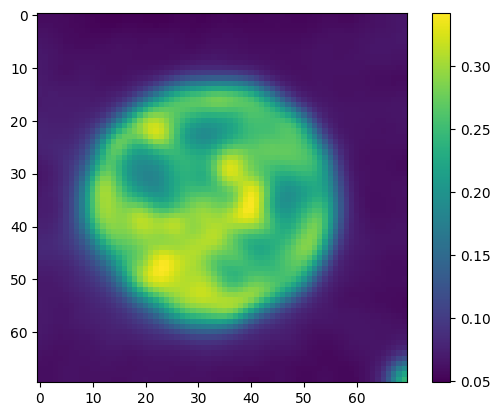

In [ ]:
plt.imshow(test)
plt.show()

from skimage import img_as_float
from scipy.ndimage import convolve
original = convolve(test,psf_real)
original_f = img_as_float(original)
plt.imshow(original_f)
plt.colorbar()
plt.show()

In [ ]:
np.max(original_f)

0.34232089723048753

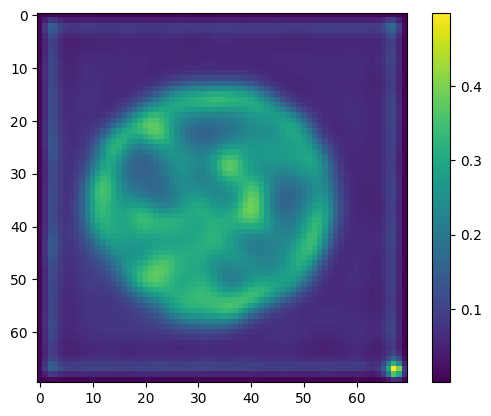

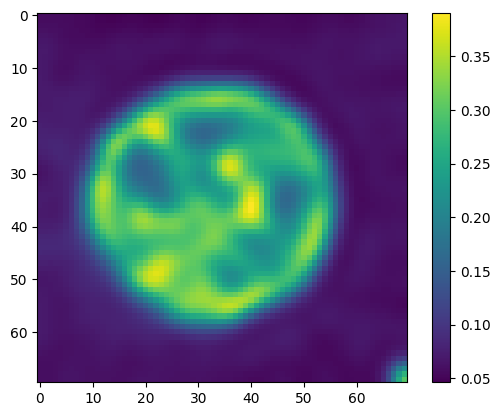

In [ ]:
from skimage.restoration import richardson_lucy as RL_decon
decon_10 = RL_decon(original_f,psf_real,num_iter=10)
plt.imshow(decon_10)
plt.colorbar()
plt.show()

original_p = np.pad(original_f, (25,25), 'edge')
decon_10_p = RL_decon(original_p,psf_real,num_iter=10)
plt.imshow(decon_10_p[25:-25,25:-25])
plt.colorbar()
plt.show()

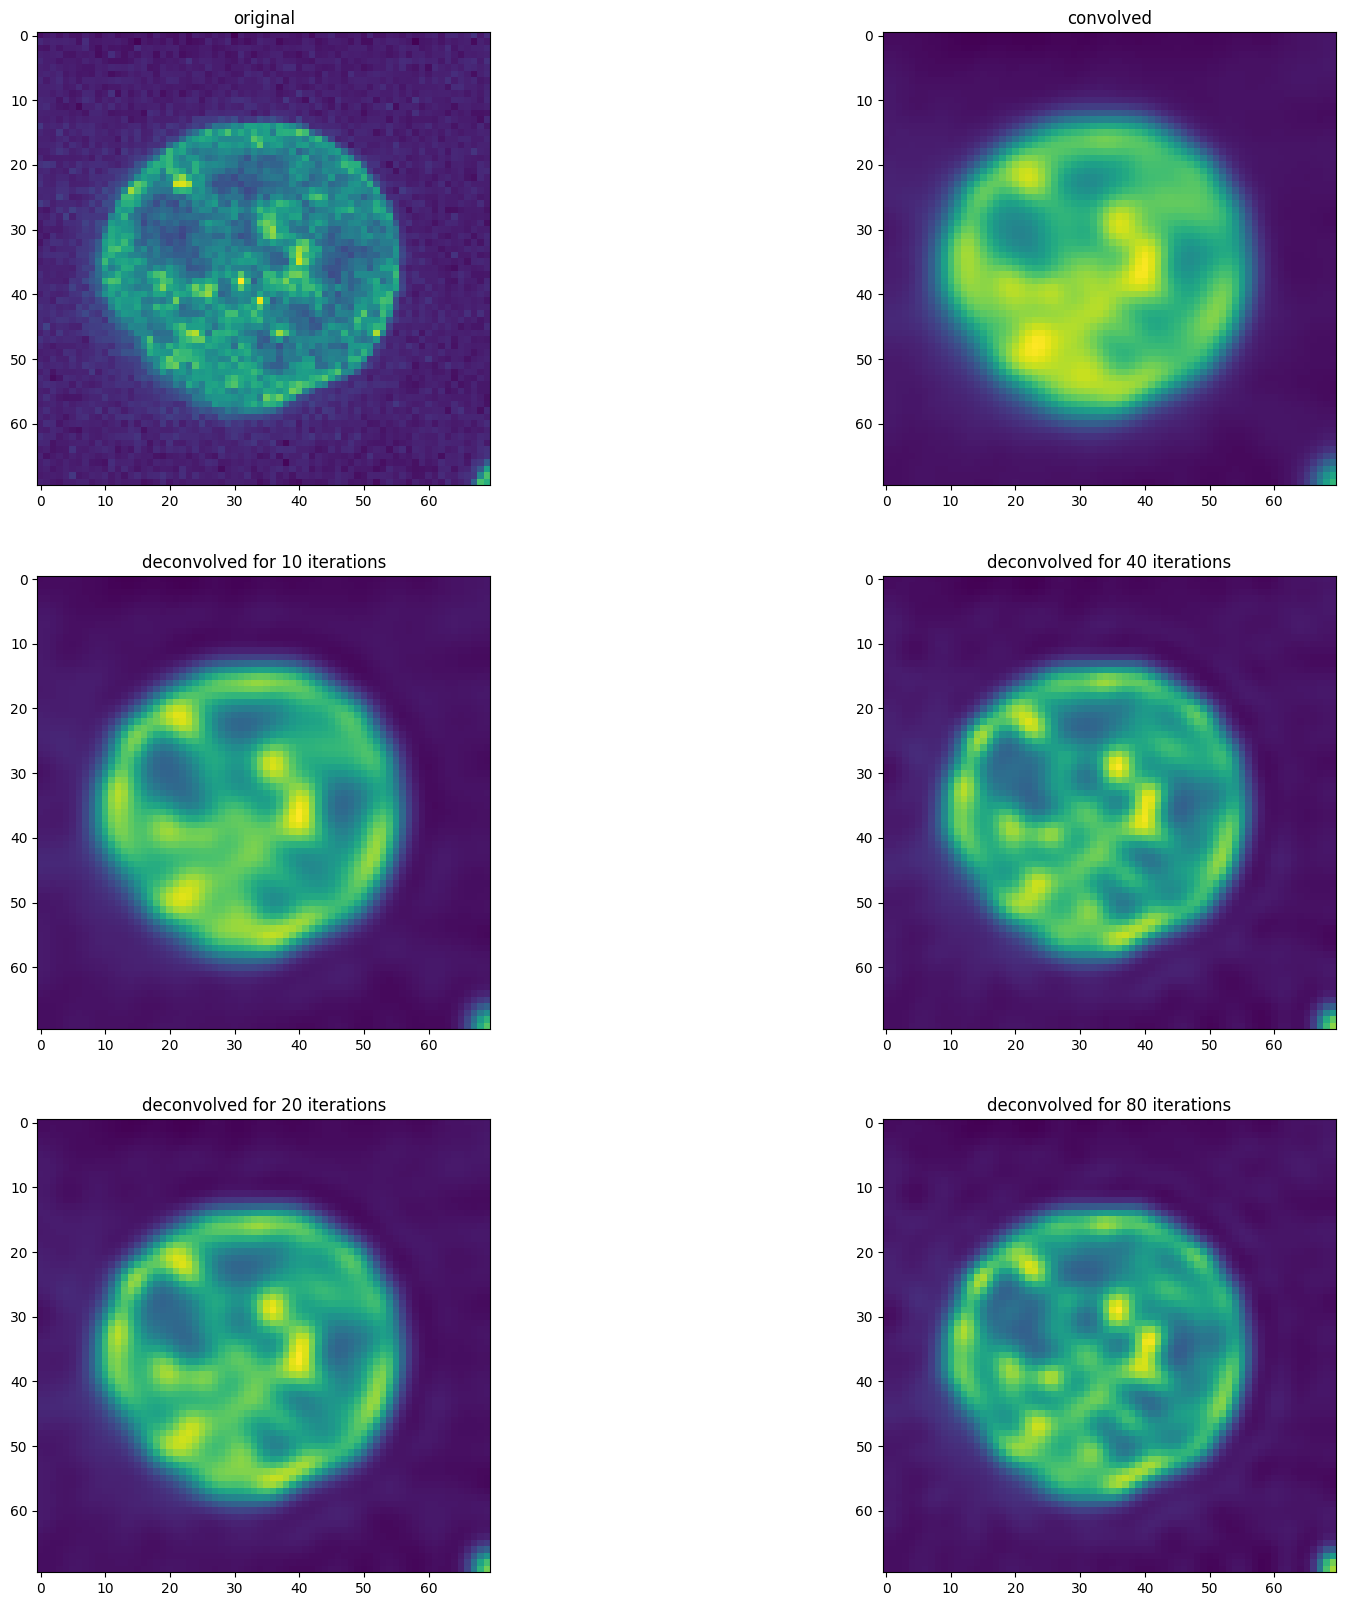

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(20,20))

axs[0,0].imshow(test)
axs[0,0].set_title("original")

axs[0,1].imshow(original_f)
axs[0,1].set_title("convolved")

for i, number_of_iterations in enumerate([10, 20, 40, 80]):

    deconvolved = RL_decon(original_p, psf_real, number_of_iterations)

    axs[(i) % 2 + 1, int((i) / 2)].imshow(deconvolved[25:-25,25:-25])

    axs[(i) % 2 + 1, int((i) / 2)].set_title("deconvolved for " + str(number_of_iterations) + " iterations")

In [ ]:
from sklearn.metrics import mean_squared_error

for i, number_of_iterations in enumerate([10, 20, 40, 80]):

    deconvolved = RL_decon(original_p, psf_real, number_of_iterations)
    print(mean_squared_error(img_as_float(test),deconvolved[25:-25,25:-25]))

0.00091541287711065
0.0008123308011354902
0.0007292804049613206
0.0006672912908195977
